<h1>Predicting Concrete Compressive Strength Using Machine Learning Models</h1>

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for visualization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [152]:
file_path="C:/Users/USER/Desktop/ML/Concrete Strength prediction/concrete+compressive+strength/Concrete_Data.csv"
df=pd.read_csv(file_path)
df=df.dropna(axis=0)
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                             79.99  
1                                             61.89  
2                                             40.27  
3                                             41.05  
4                                             44.30

array([[<Axes: title={'center': 'Cement (component 1)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Water  (component 4)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Age (day)'}>,
        <Axes: title={'center': 'Concrete compressive strength(MPa, megapascals) '}>]],
      dtype=object)

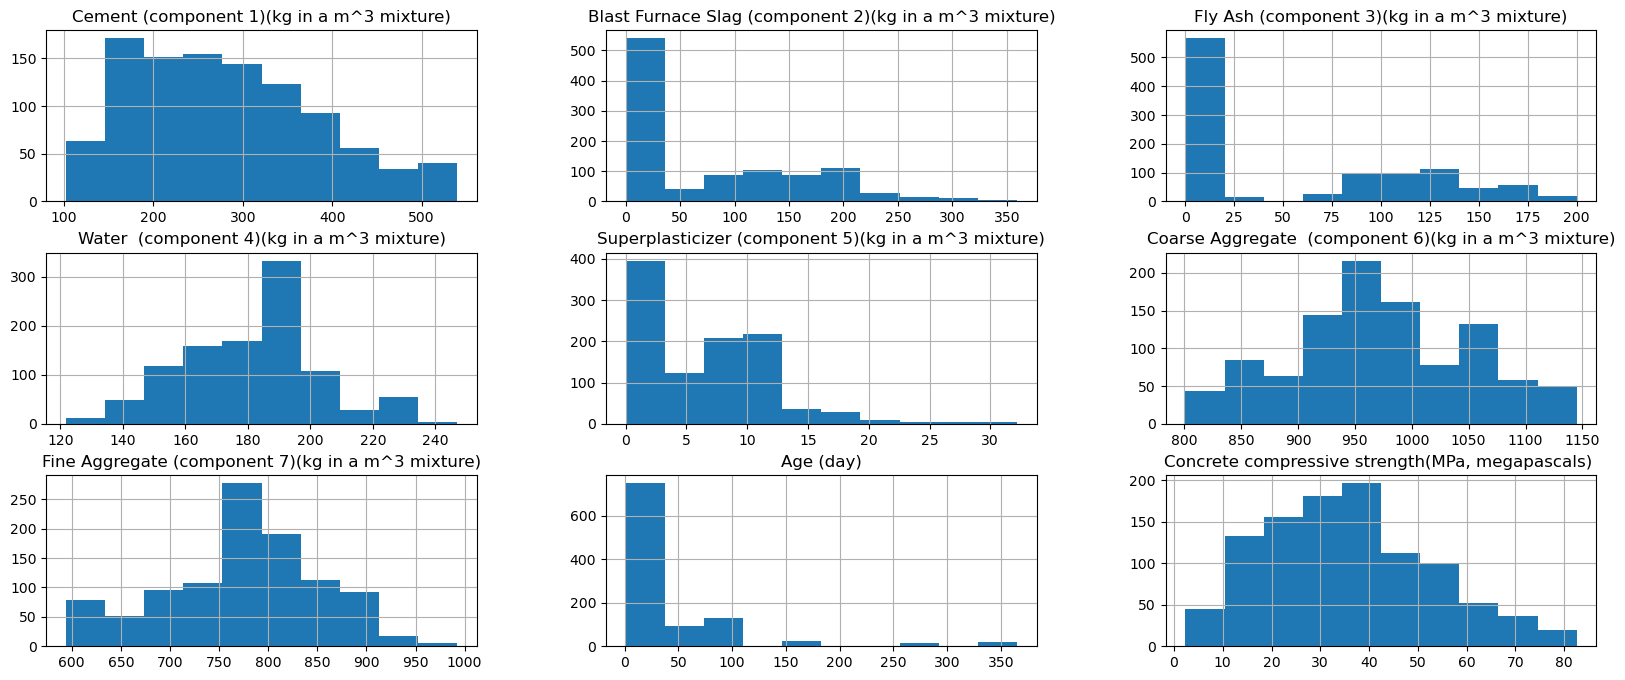

In [153]:
df.hist(figsize=(20,8))

<h4>FINDING DUPLICATE VALUES</h4>

In [154]:
#finding duplicate values
for feature in df.columns:
    print(f"{feature} ----- {df.duplicated(feature).sum()}")

Cement (component 1)(kg in a m^3 mixture) ----- 752
Blast Furnace Slag (component 2)(kg in a m^3 mixture) ----- 845
Fly Ash (component 3)(kg in a m^3 mixture) ----- 874
Water  (component 4)(kg in a m^3 mixture) ----- 835
Superplasticizer (component 5)(kg in a m^3 mixture) ----- 919
Coarse Aggregate  (component 6)(kg in a m^3 mixture) ----- 746
Fine Aggregate (component 7)(kg in a m^3 mixture) ----- 728
Age (day) ----- 1016
Concrete compressive strength(MPa, megapascals)  ----- 185


In [155]:
df.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.167864   
std                                   104.506364   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895825       
std                                            86.279342       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.188350   
std                                     63.997004   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.300000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.567282   
std                                    21.354219   
min                                   121.800000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.204660     
std                                             5.973841     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.400000     
75%                                            10.200000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918932      
std                                            77.753954      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.580485    45.662136   
std                                            80.175980    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.500000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817961  
std                                           16.705742

<h4>CHECKING MISSING VALUES</h4>

In [156]:
df.isnull().sum()
#no missing values

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

<h4>CO-RELATION HEATMAP</h4>

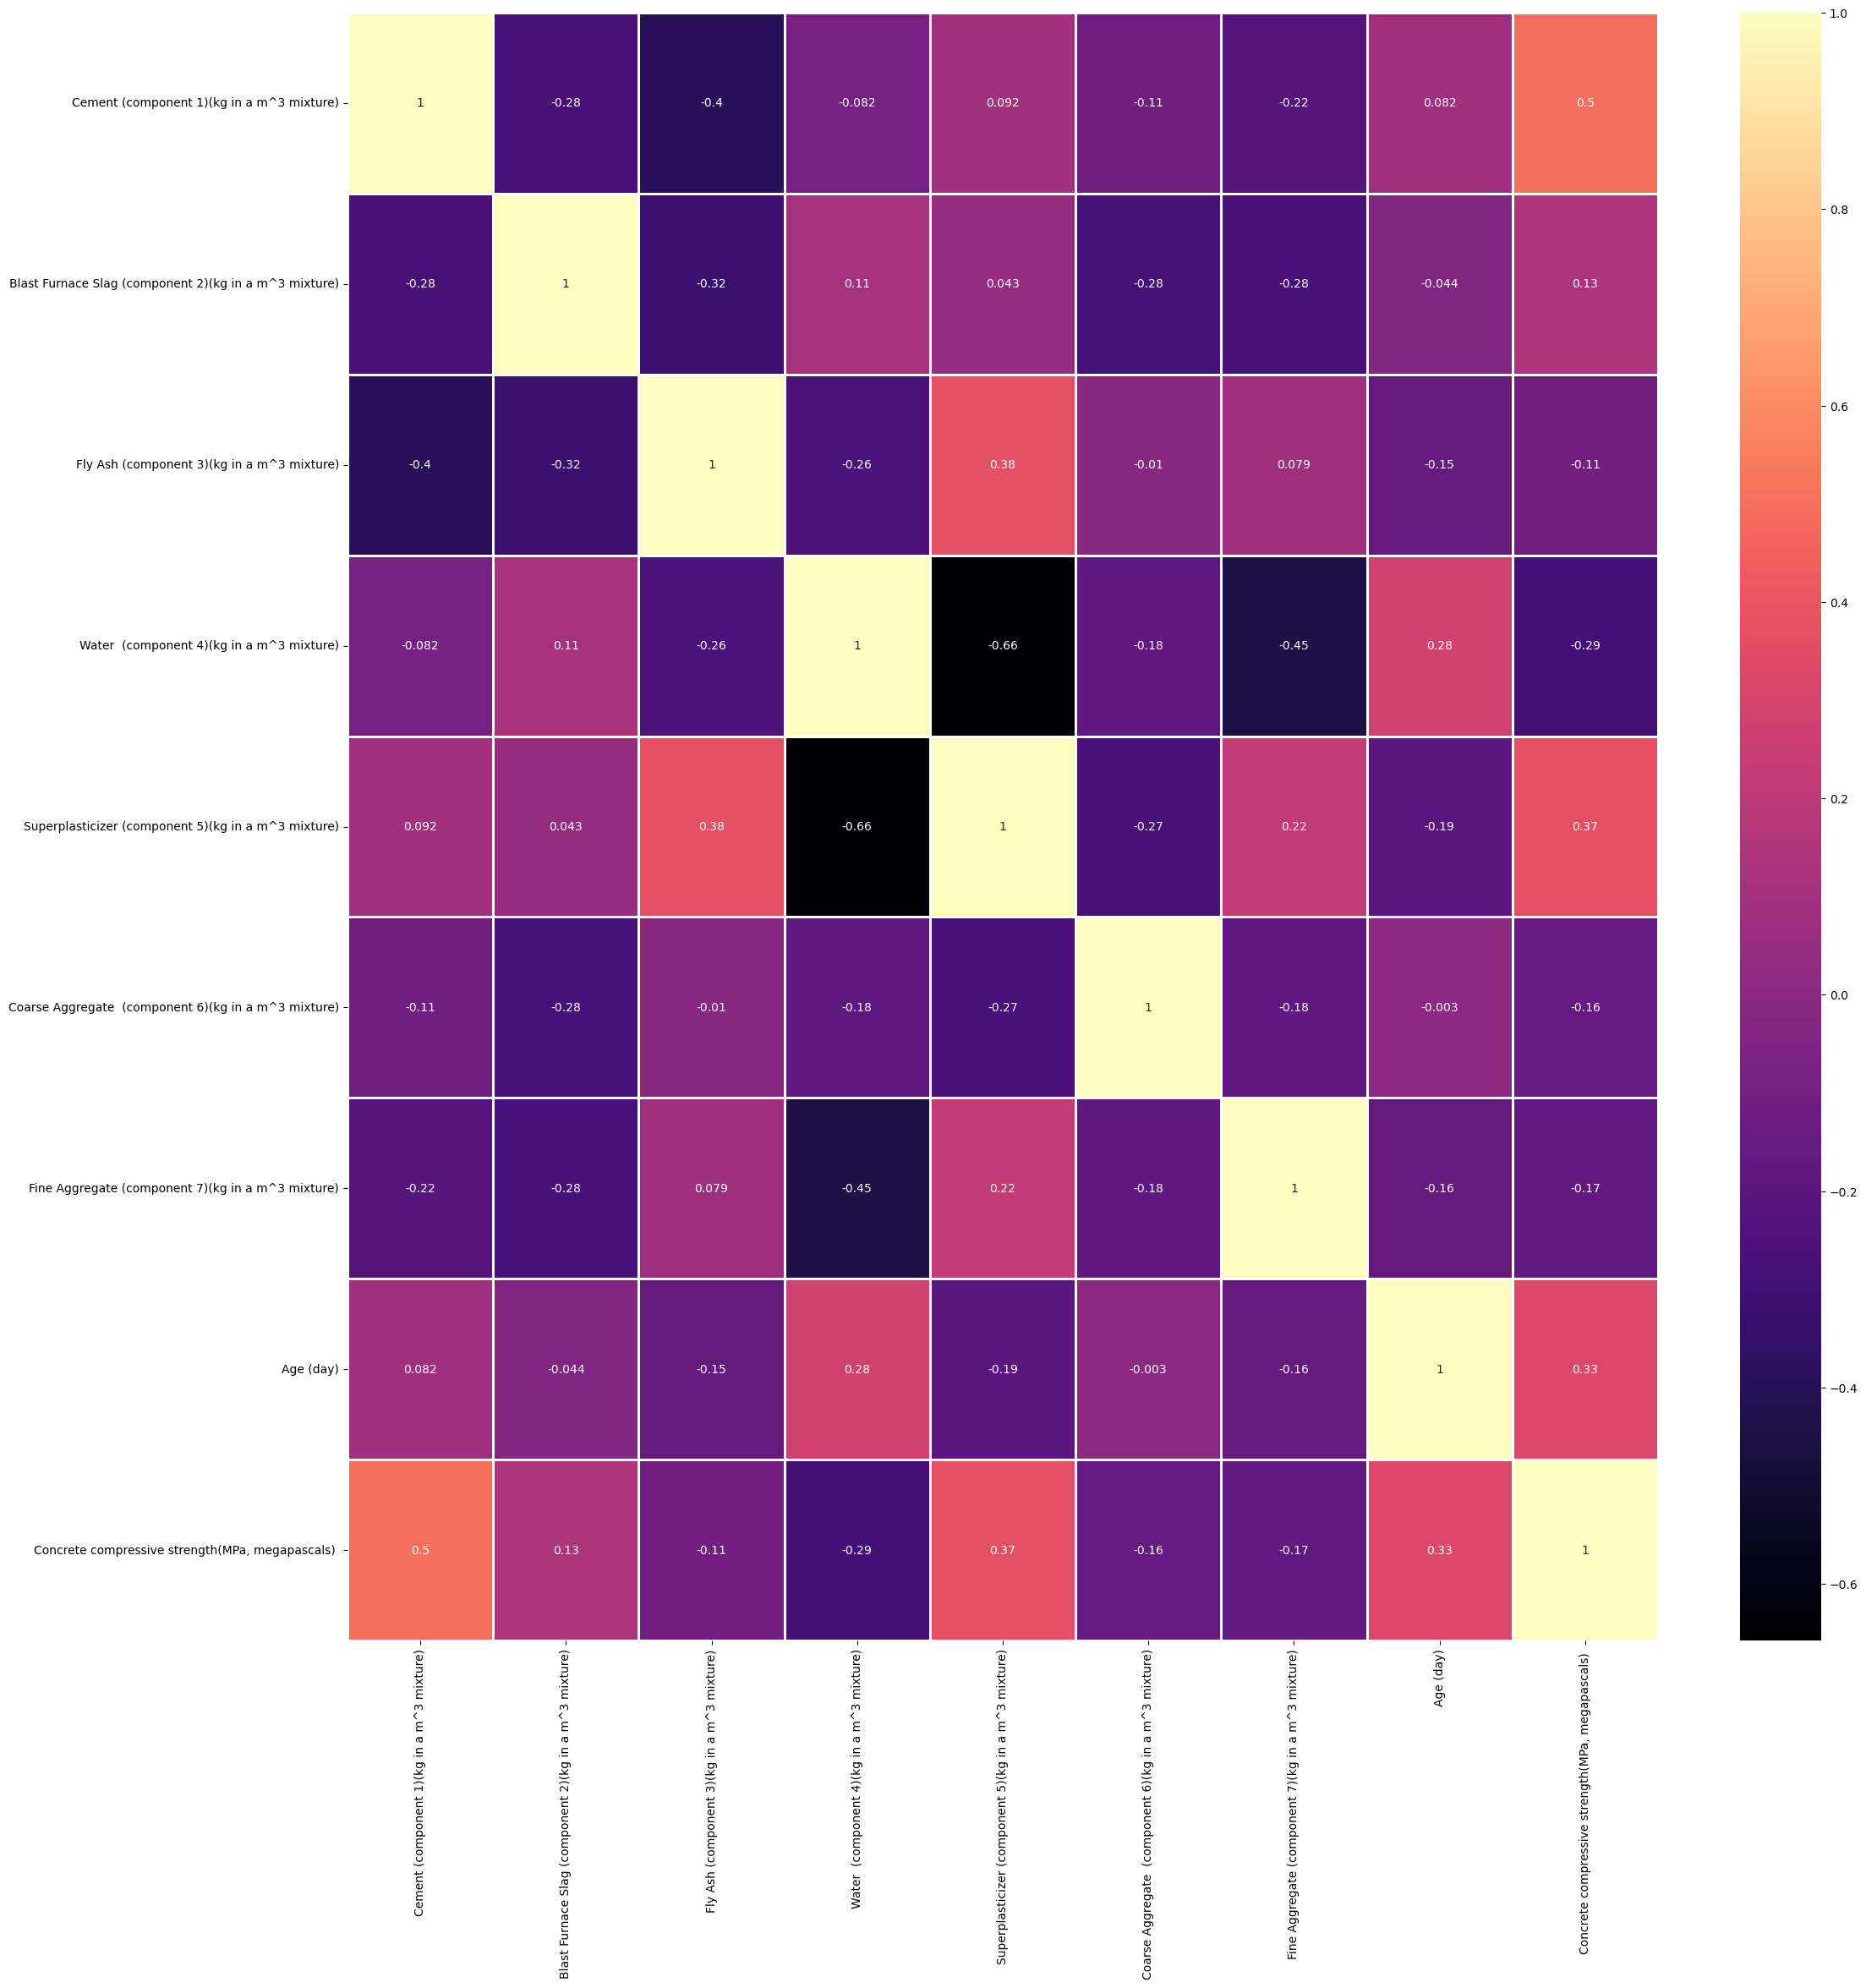

In [157]:
plt.figure(figsize=(25,25))
ax=sns.heatmap(df.corr(),cmap="magma",annot=True,linewidths=2)

<h4>FINDING DISCRETE OR CONTINUOUS</h4>

In [158]:
"""discrete_feature=[]
for feature in df.columns:
    if len(df[feature].unique())<15:
        discrete_feature.append(feature)
print(discrete_feature)"""
discrete_feature=[feature for feature in df.columns if len(df[feature].unique())<15]
print(discrete_feature)
print("Discrete Variable count:{}".format(len(discrete_feature)))

['Age (day)']
Discrete Variable count:1


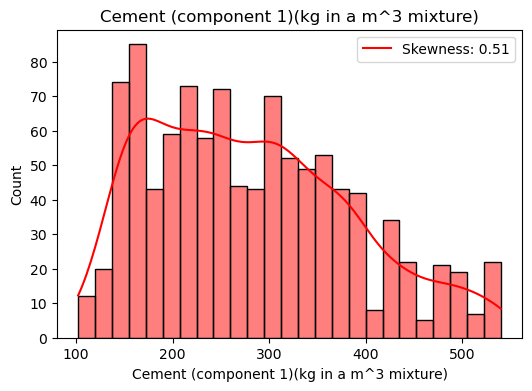

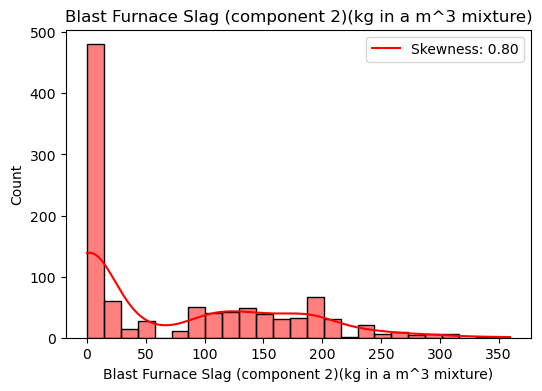

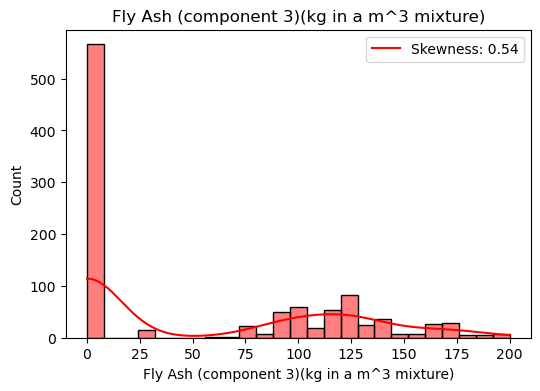

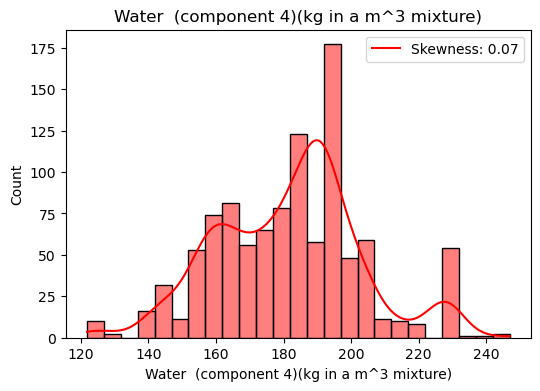

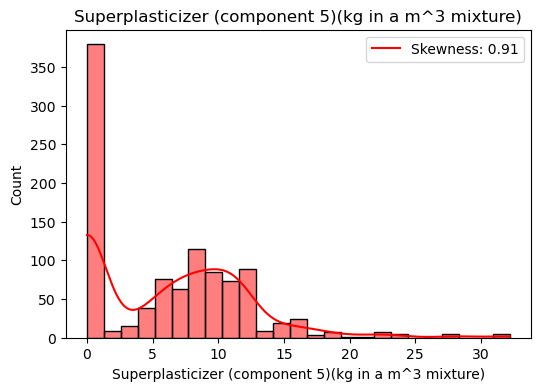

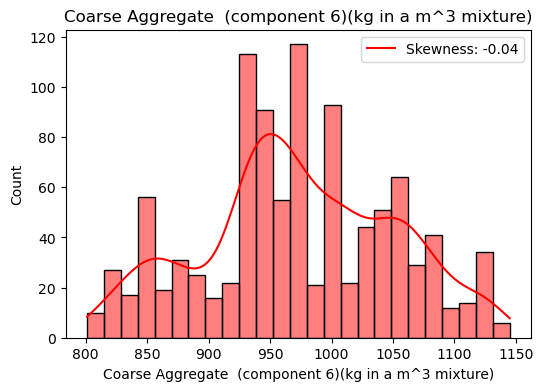

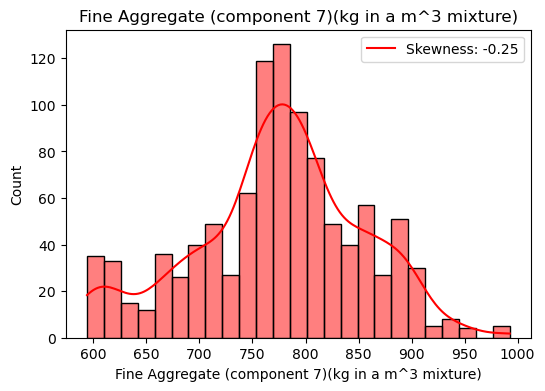

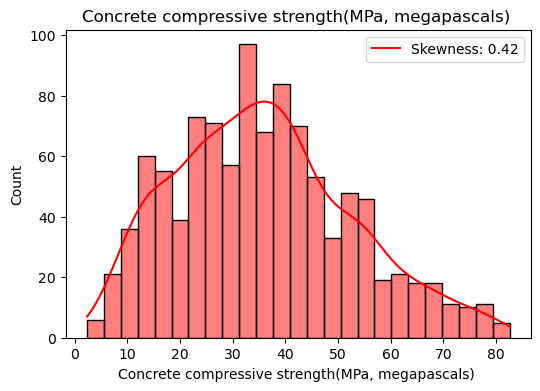

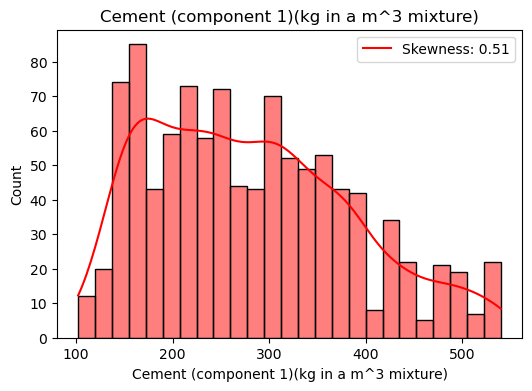

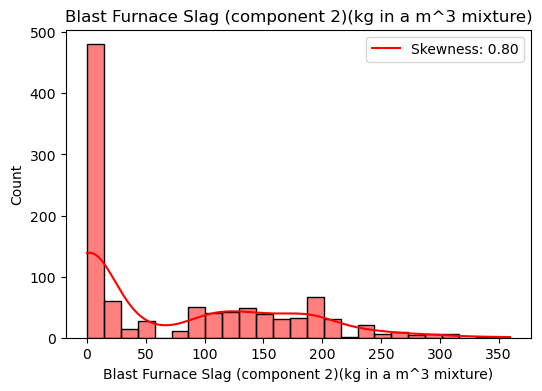

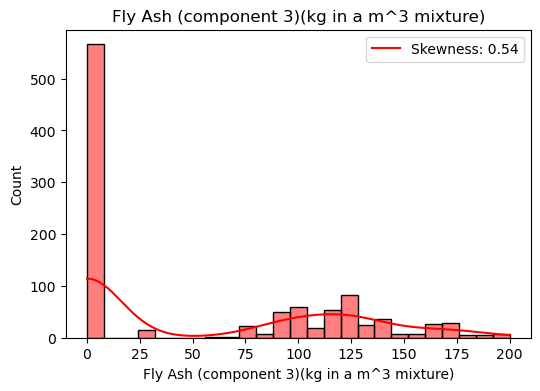

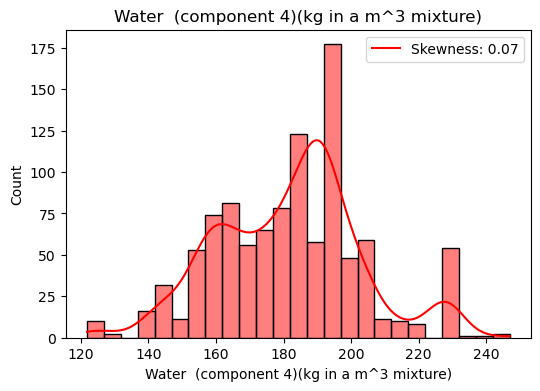

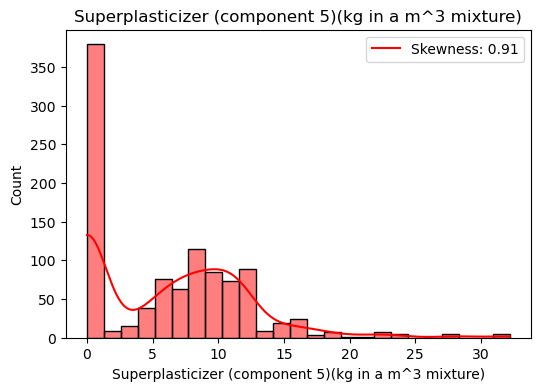

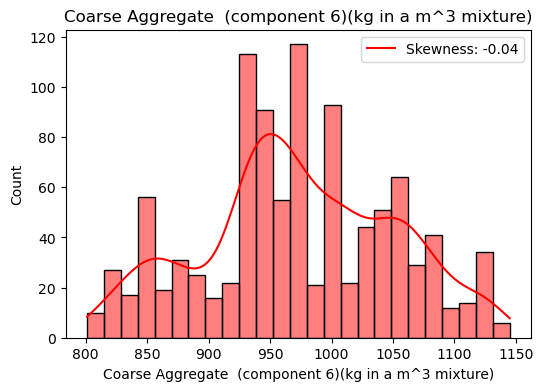

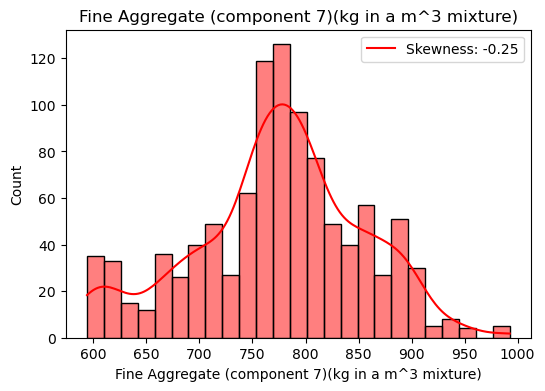

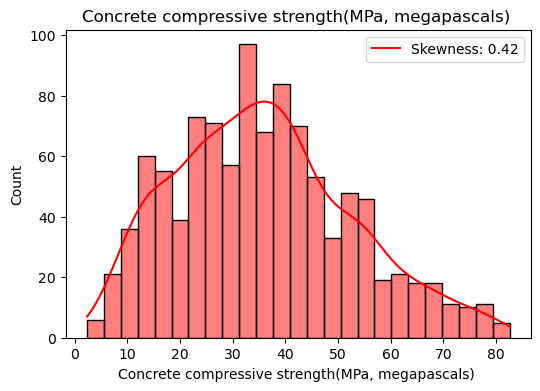

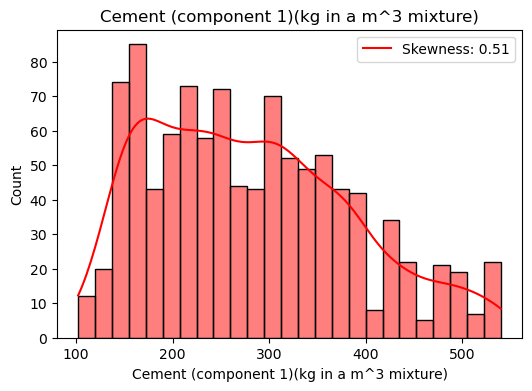

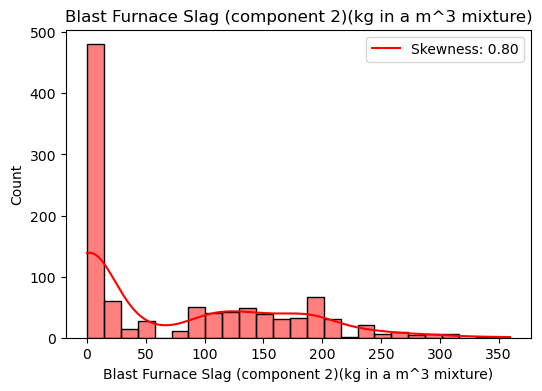

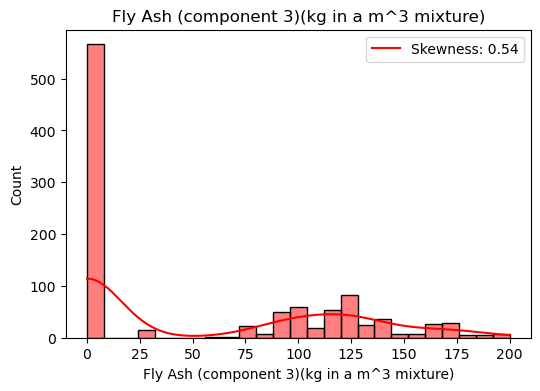

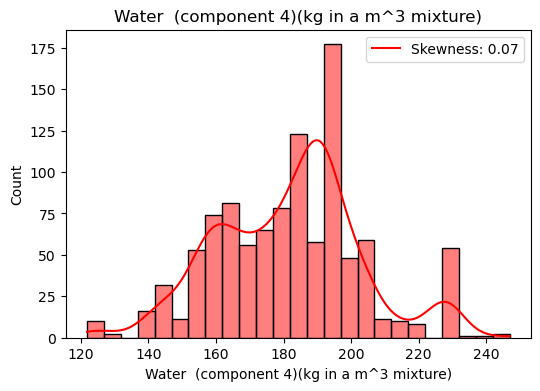

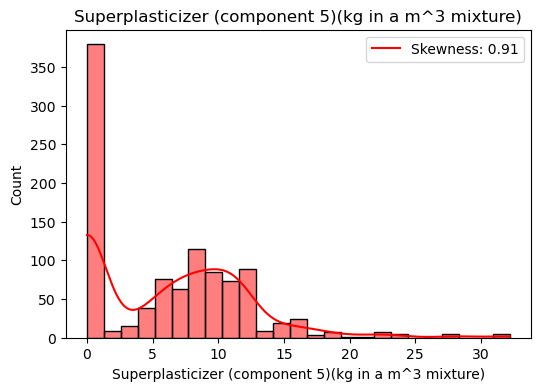

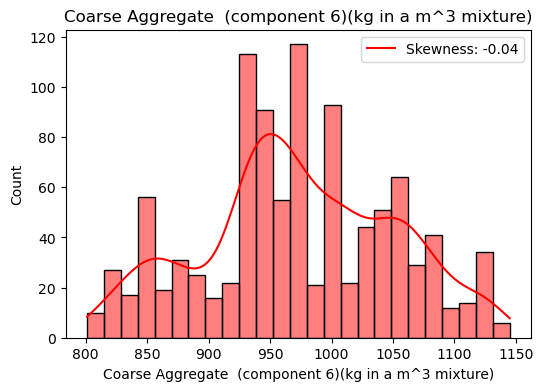

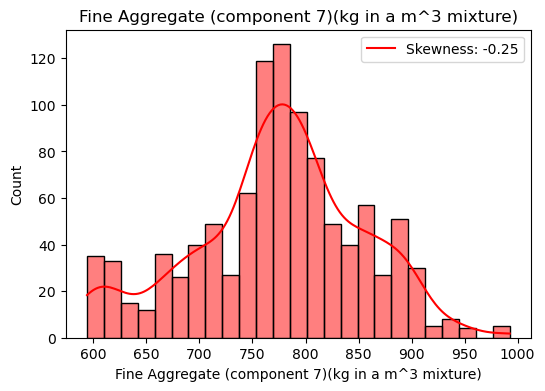

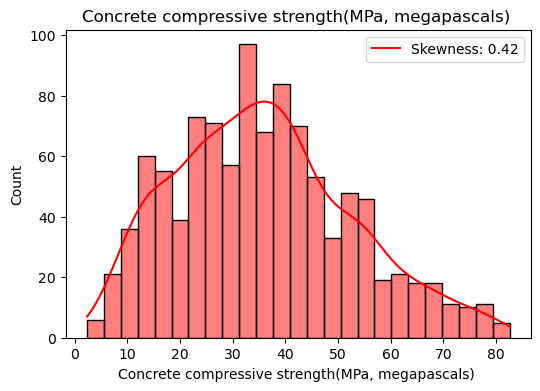

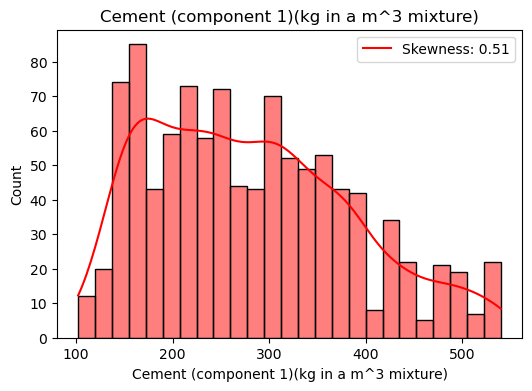

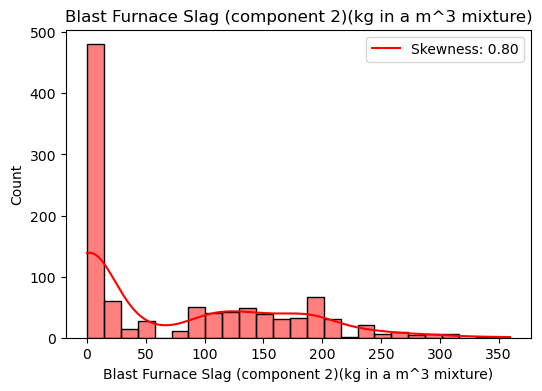

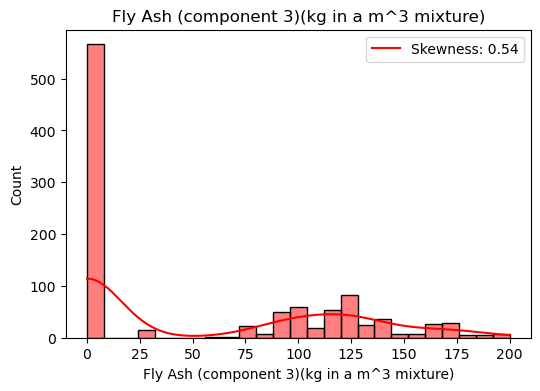

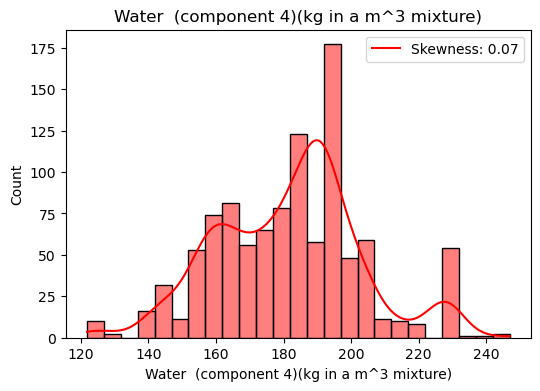

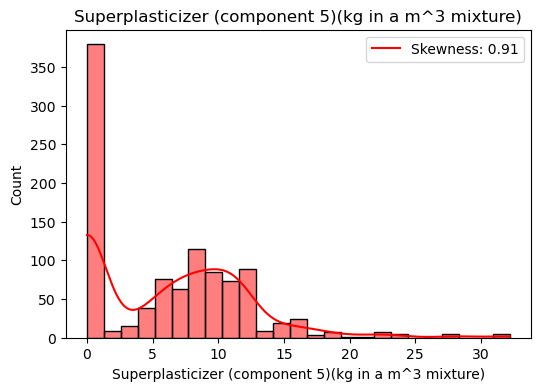

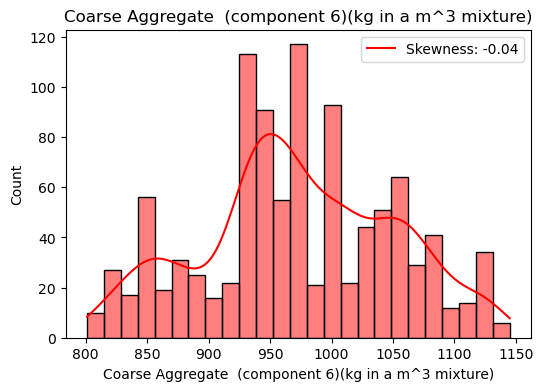

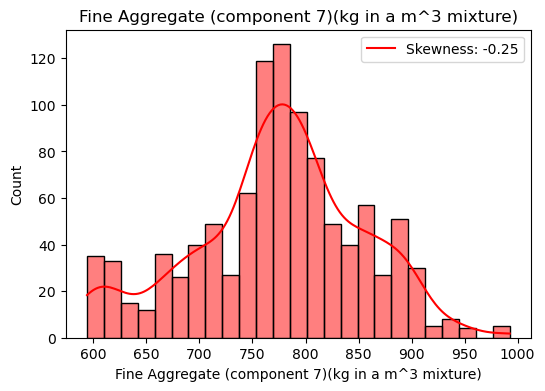

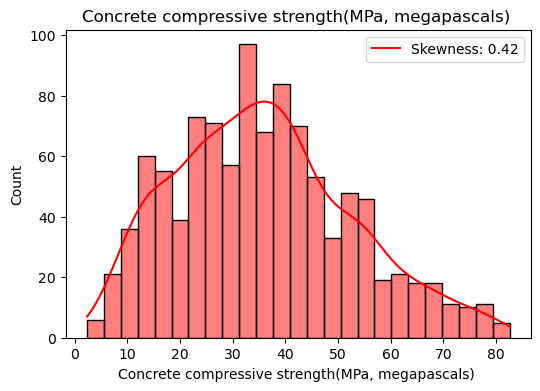

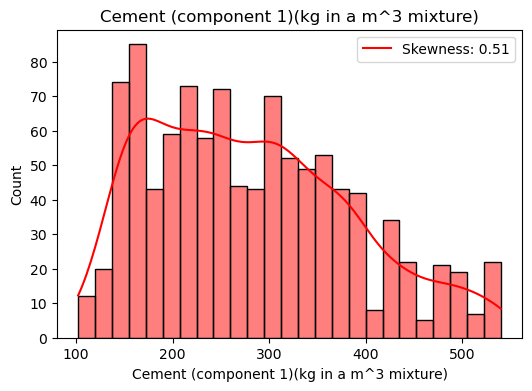

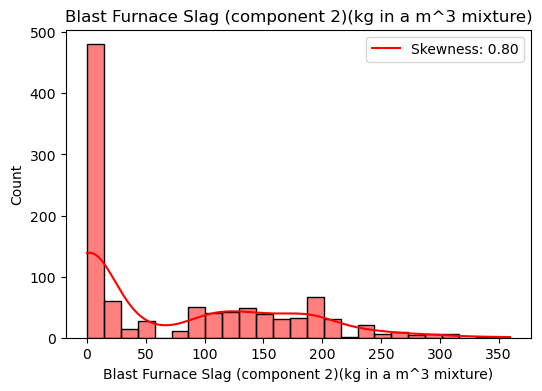

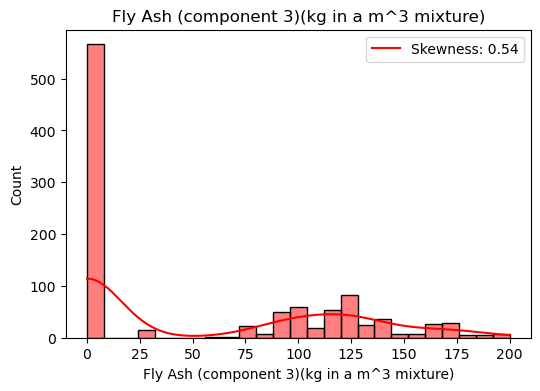

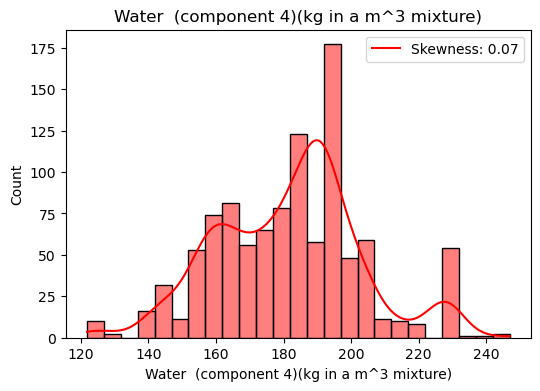

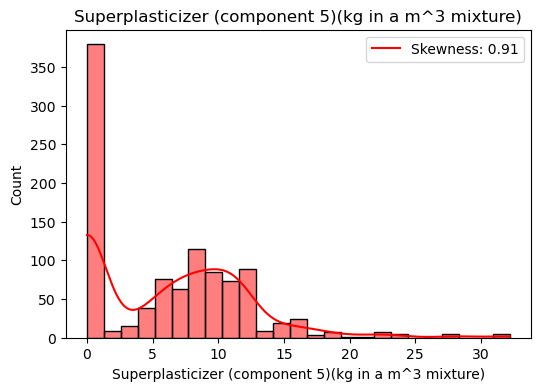

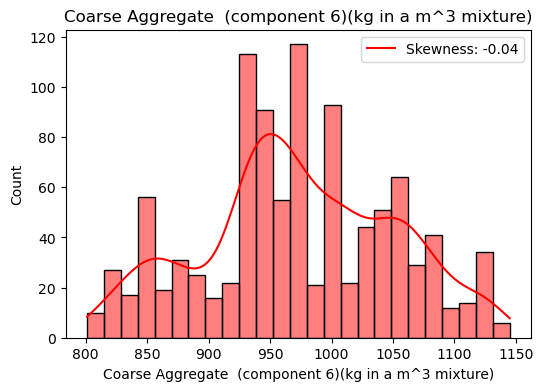

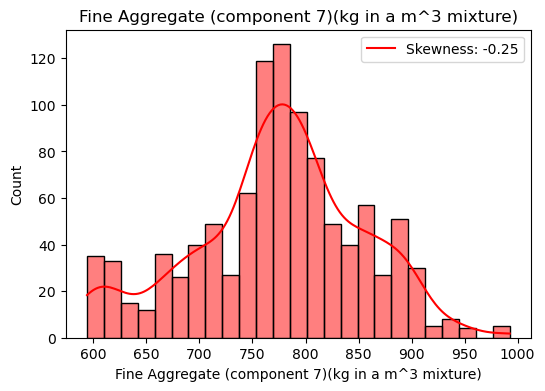

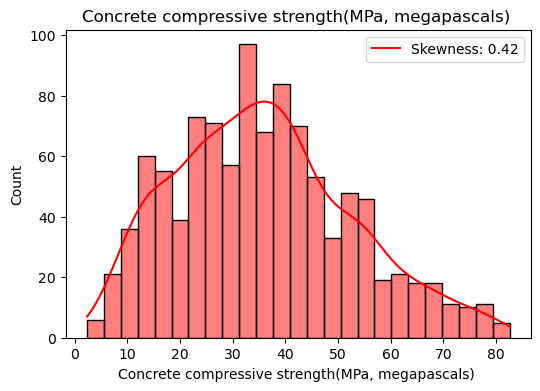

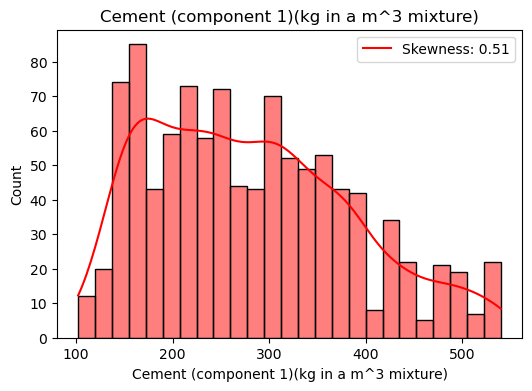

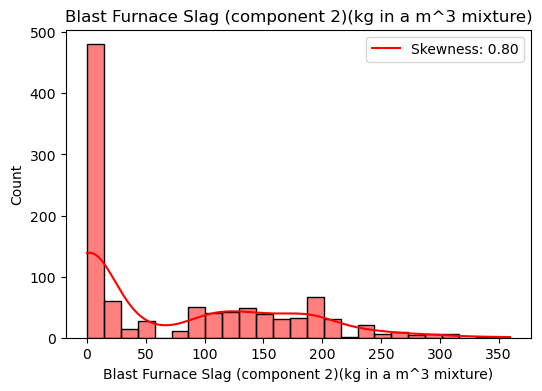

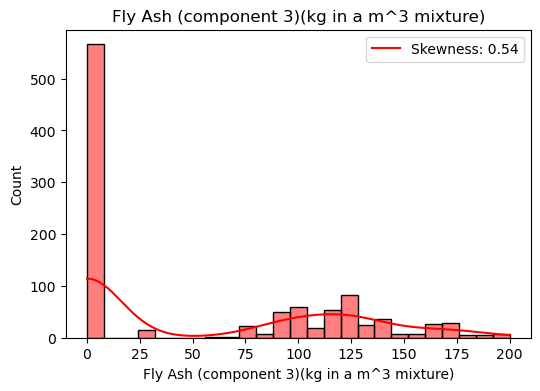

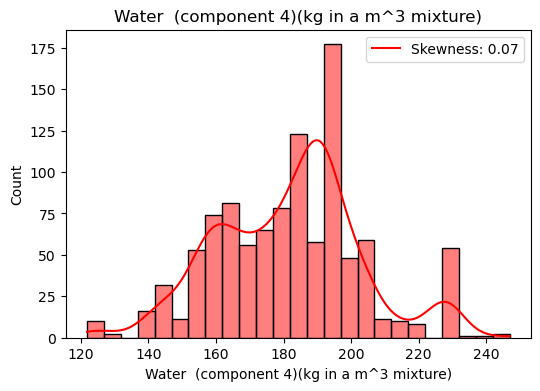

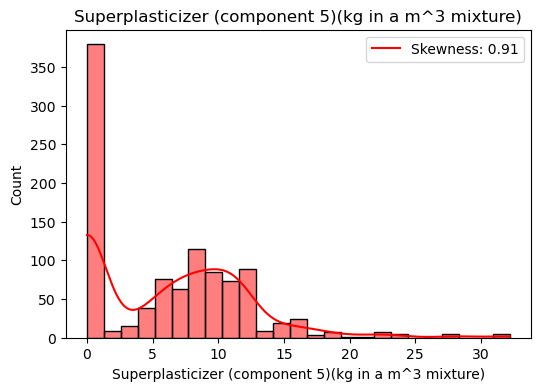

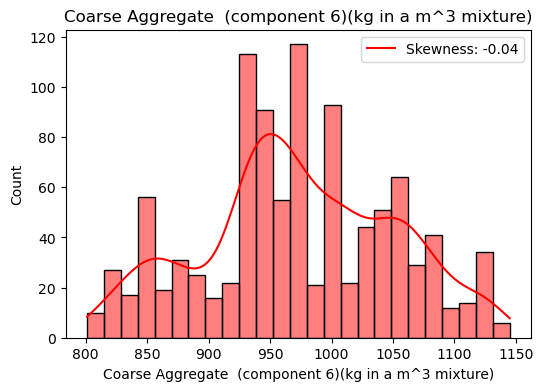

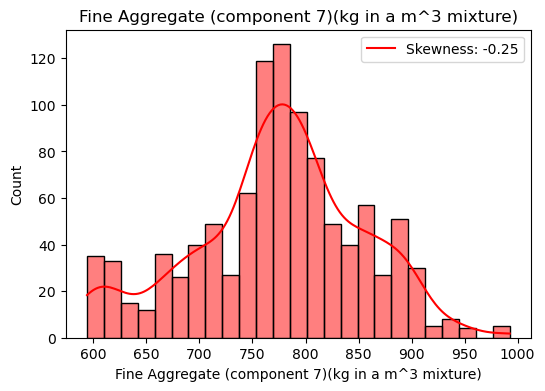

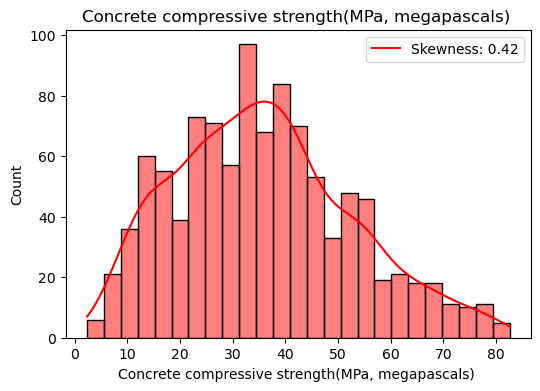

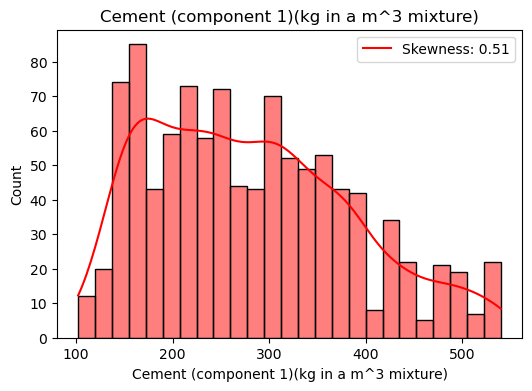

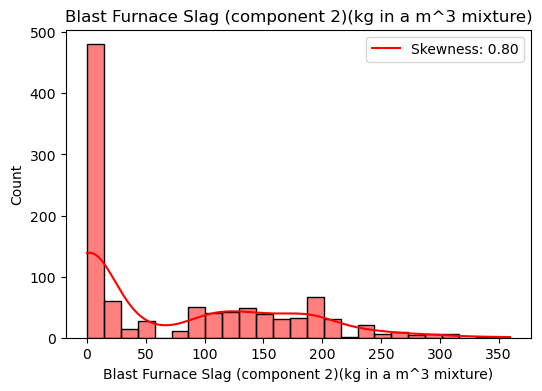

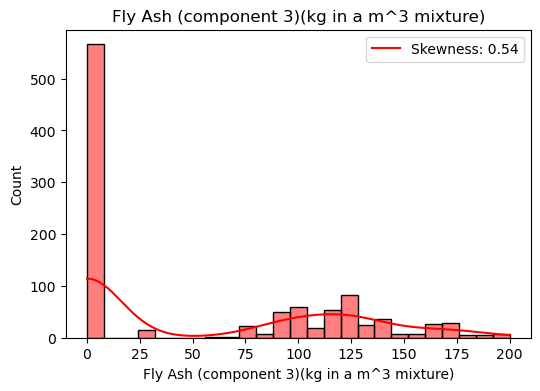

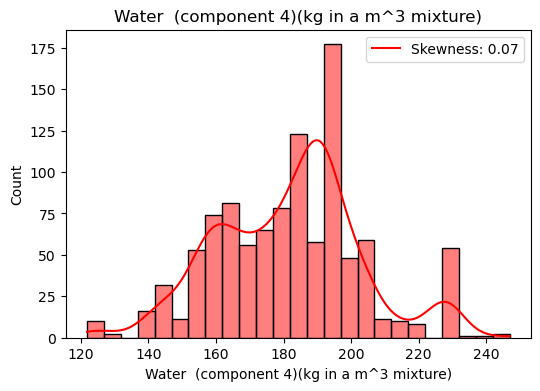

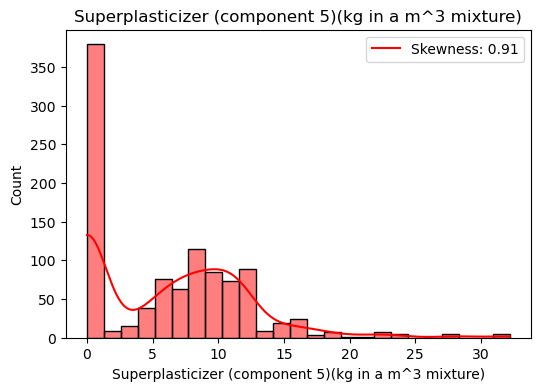

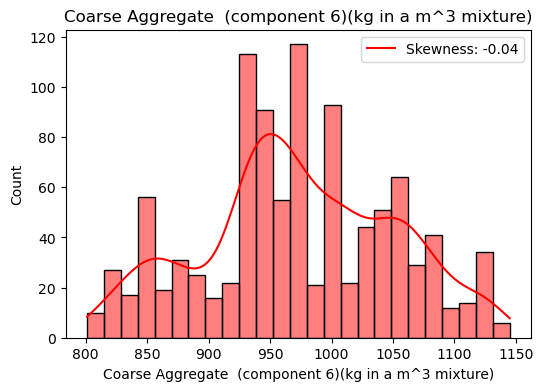

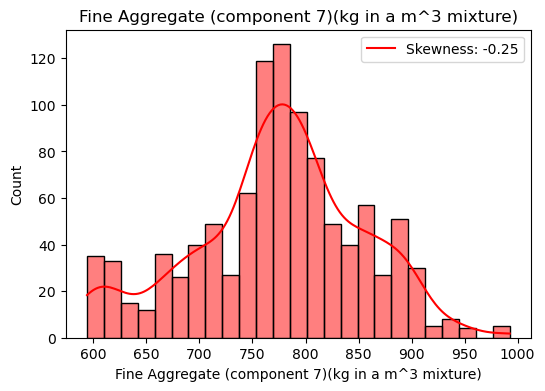

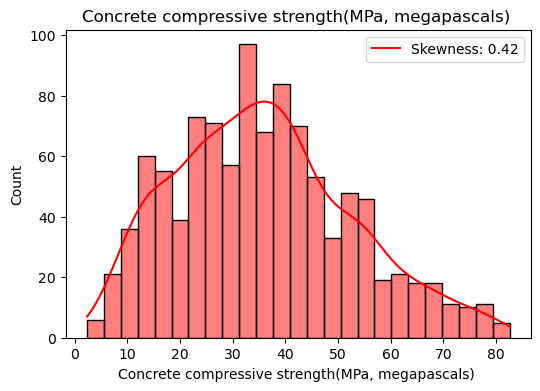

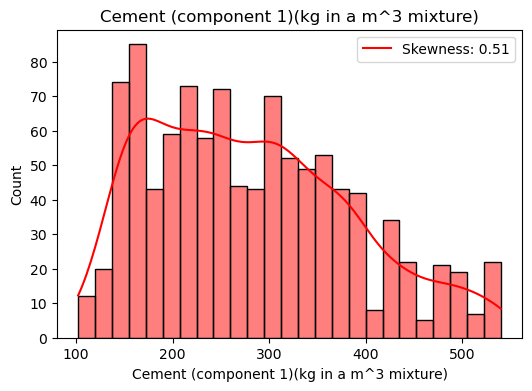

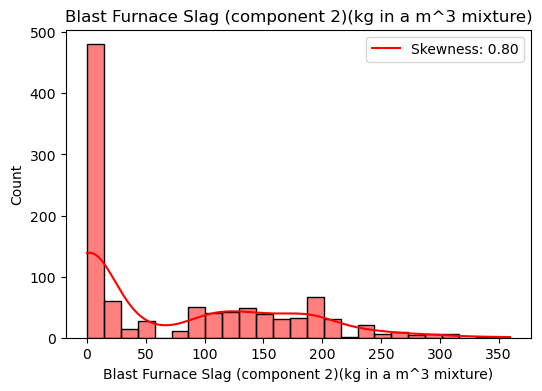

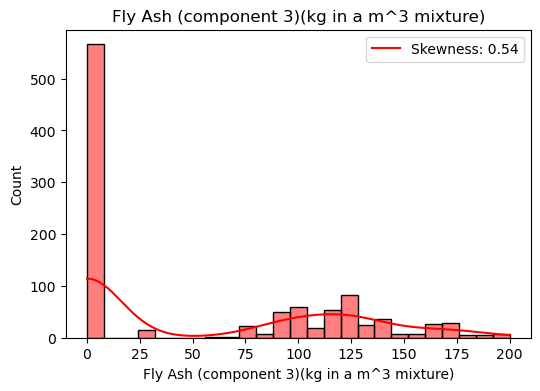

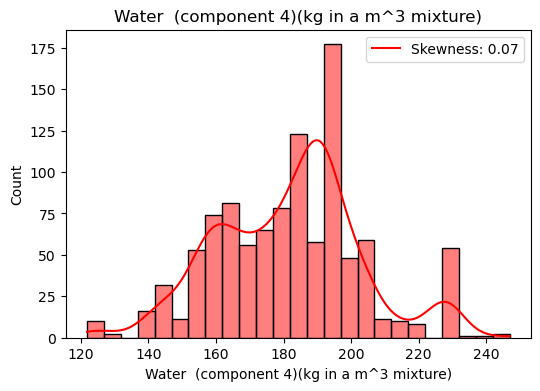

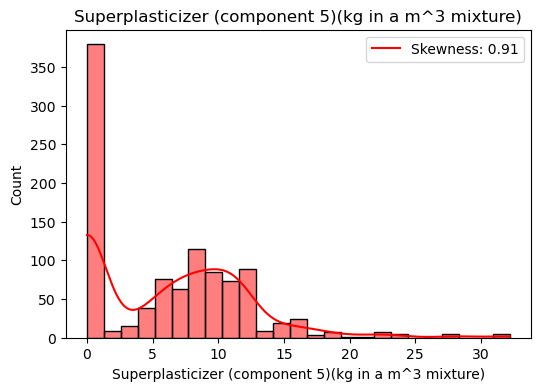

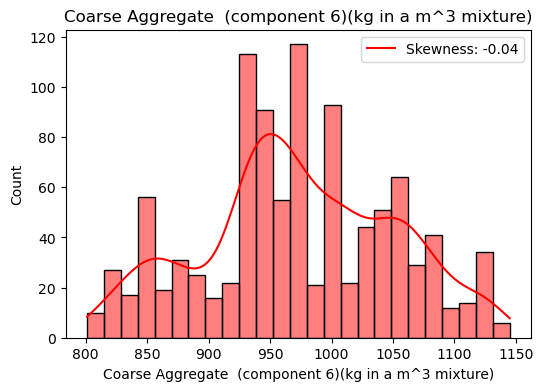

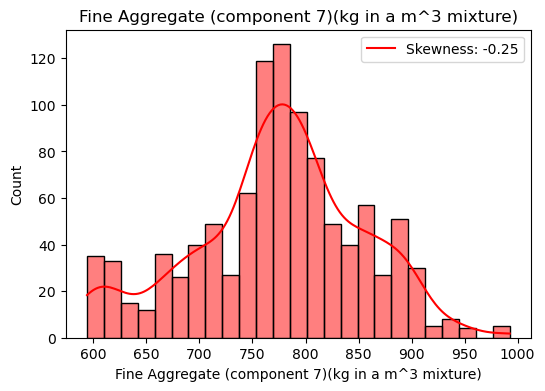

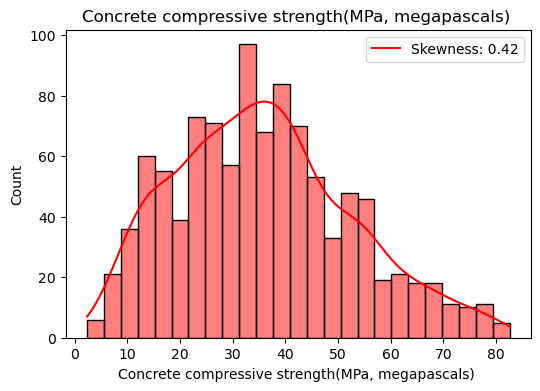

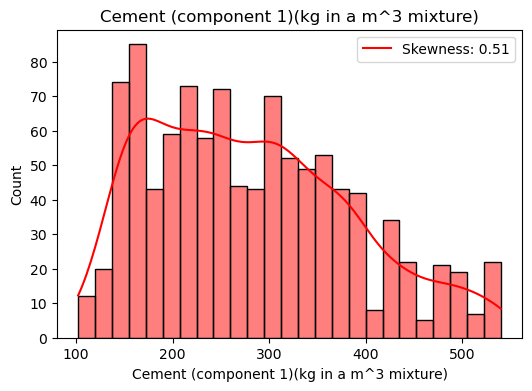

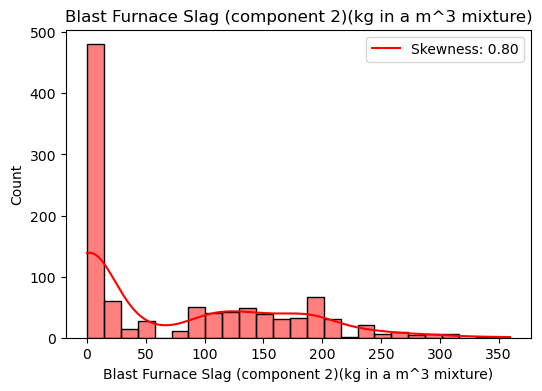

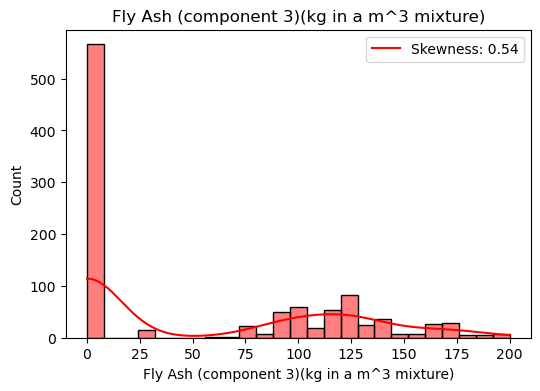

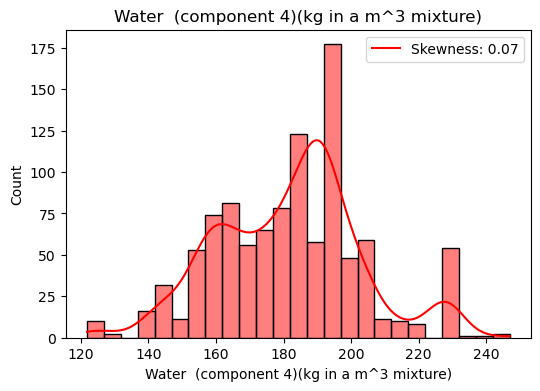

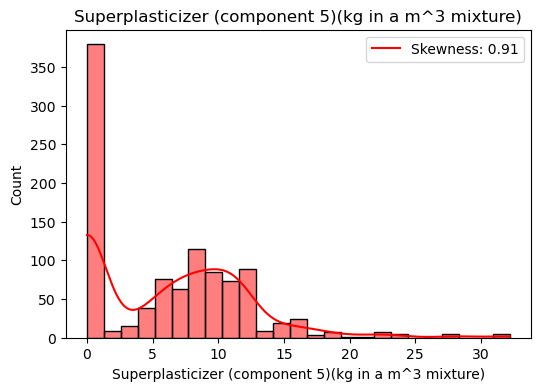

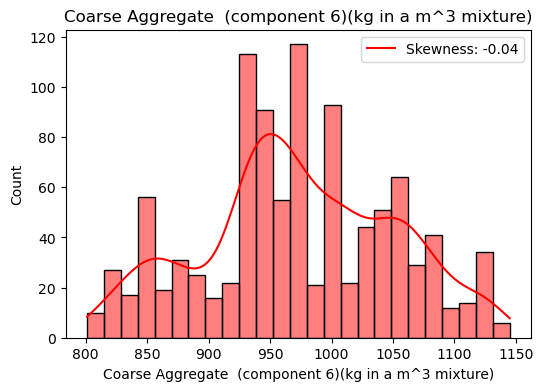

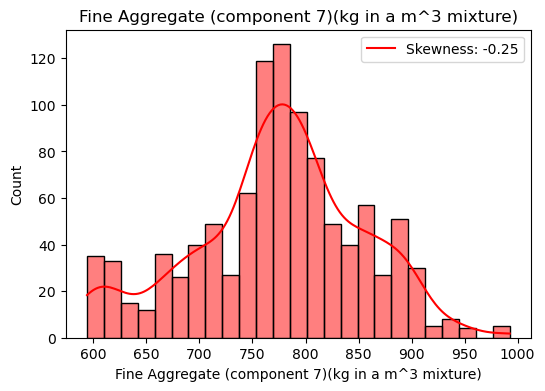

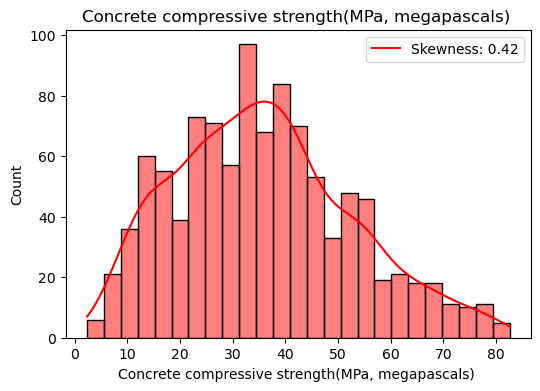

In [159]:
for feature in df.columns:
    for feature in df.columns:
        if feature == "Age (day)":
            continue   # skip discrete feature
        else:
            plt.figure(figsize=(6, 4))
            sns.histplot(df[feature], bins=25, kde=True, color='red')
            plt.legend([f"Skewness: {df[feature].skew():.2f}"])
            plt.xlabel(feature)
            plt.ylabel("Count")
            plt.title(feature)
            plt.show()

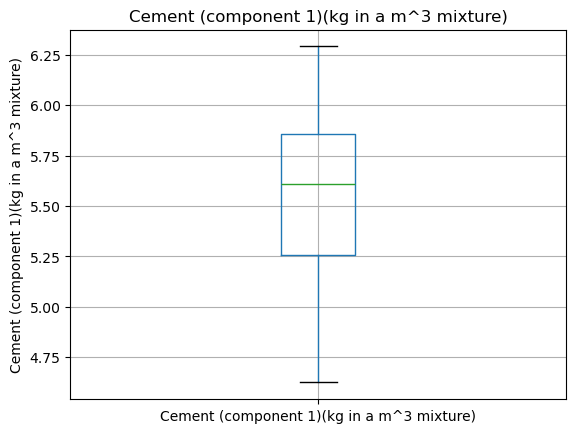

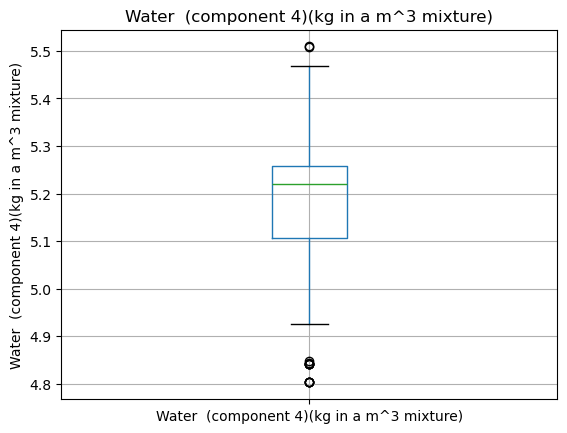

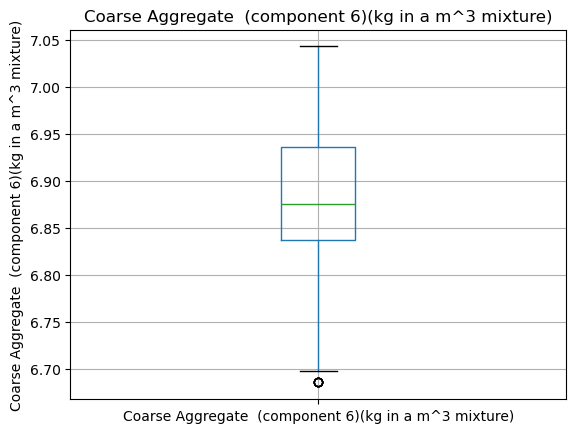

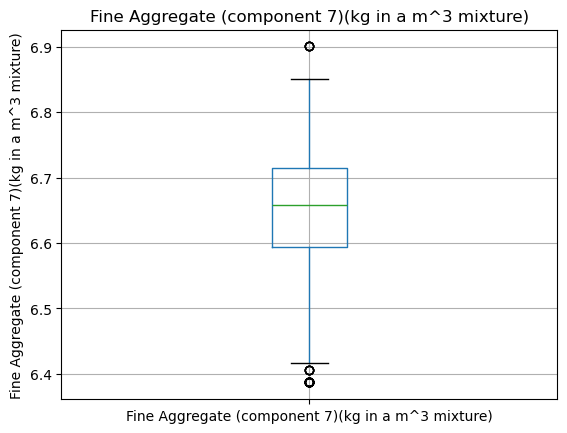

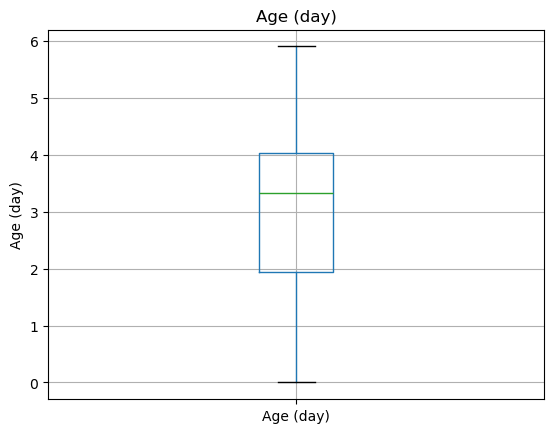

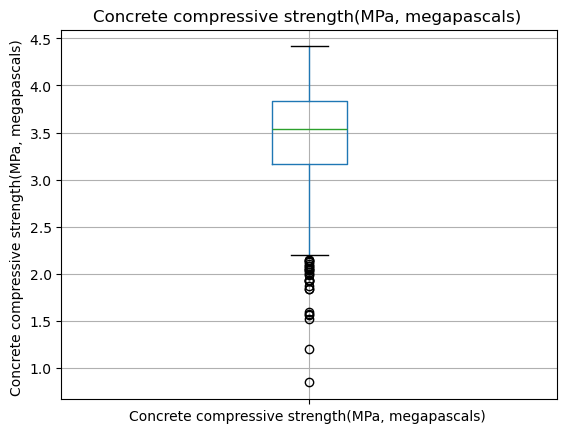

In [160]:
for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

<h3>TRANSFORMATION</h3>

In [161]:
import scipy.stats as stat
import pylab 

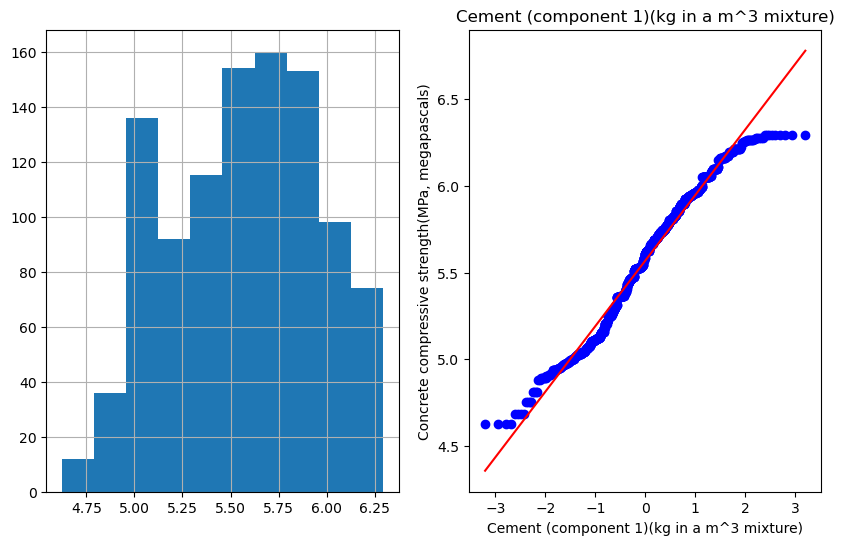

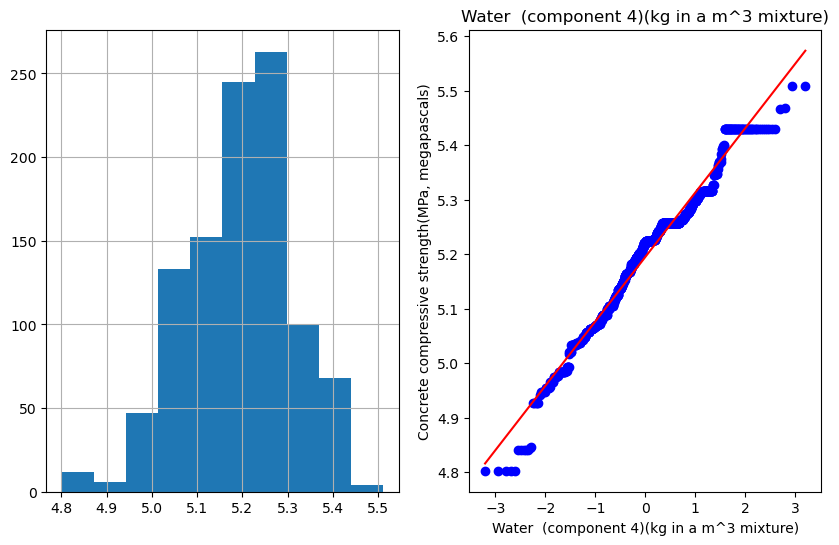

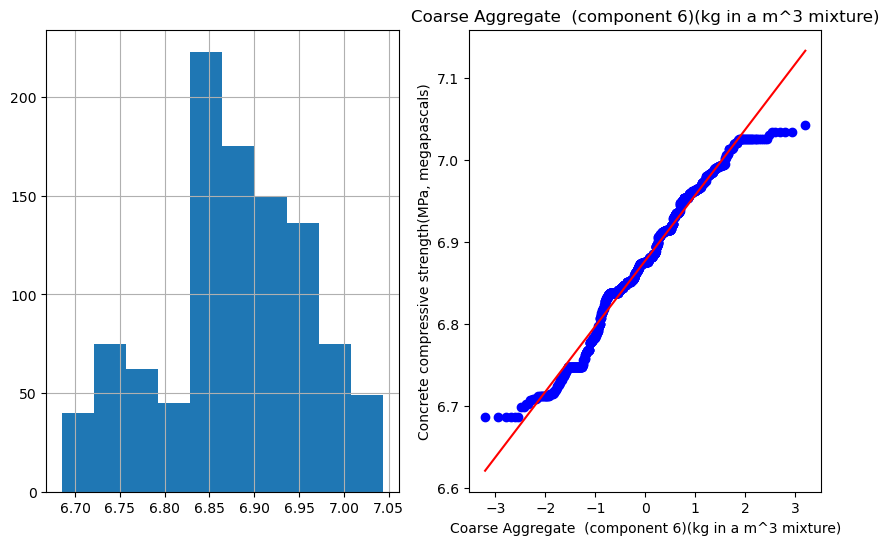

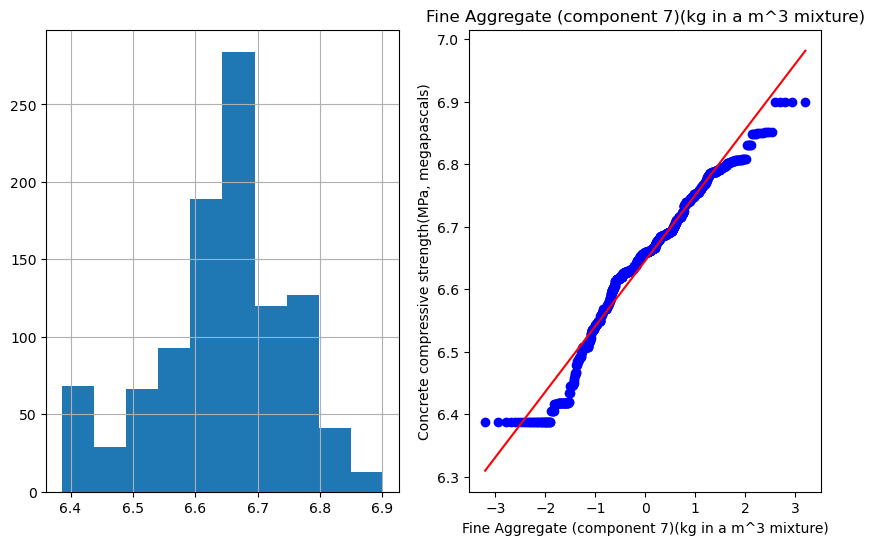

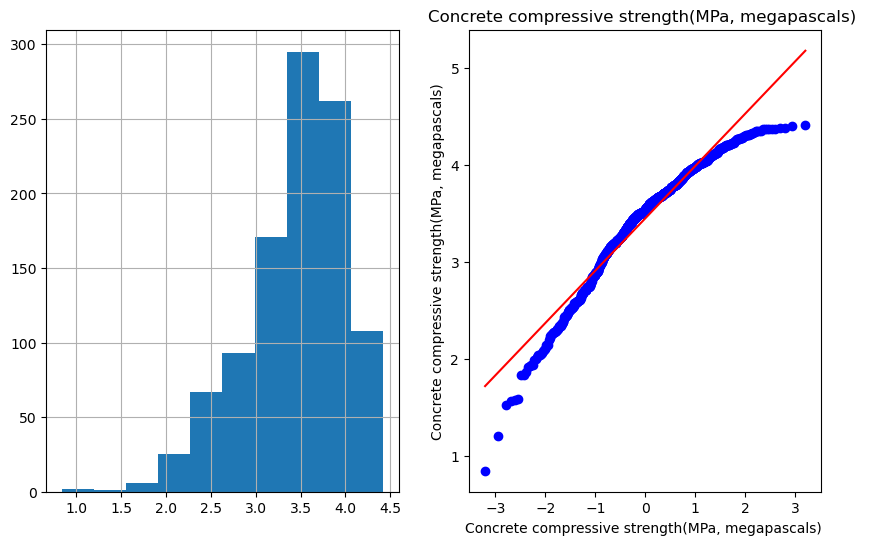

In [162]:
for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    elif feature=='Age (day)':
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.figure(figsize=(10,6))
        plt.subplot(1,2,1)
        data[feature].hist()
        plt.subplot(1,2,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)
        plt.xlabel(feature)
        plt.ylabel('Concrete compressive strength(MPa, megapascals)')
        plt.title(feature)
        plt.show()

<h3>FEATURE ENGINEERING</h3>

In [163]:
df.columns.to_list()

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [164]:
for feature in df.columns:
    if feature== 'Water  (component 4)(kg in a m^3 mixture)' :
        pass
    elif feature == 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)' :
        pass
    elif feature == 'Fine Aggregate (component 7)(kg in a m^3 mixture)' :
        pass
    elif feature ==  'Age (day)':
        pass
    else:
        df[feature]=np.log1p(df[feature])

In [173]:
#Removing outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
higher_bound=Q3+1.5*IQR

outliers=(df<lower_bound) | (df>higher_bound)
rows_with_outliers = outliers.any(axis=1)

df = df[~rows_with_outliers]
print(df.shape)

#df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

(755, 9)


<h3>DATA VISUALIZATION</h3>

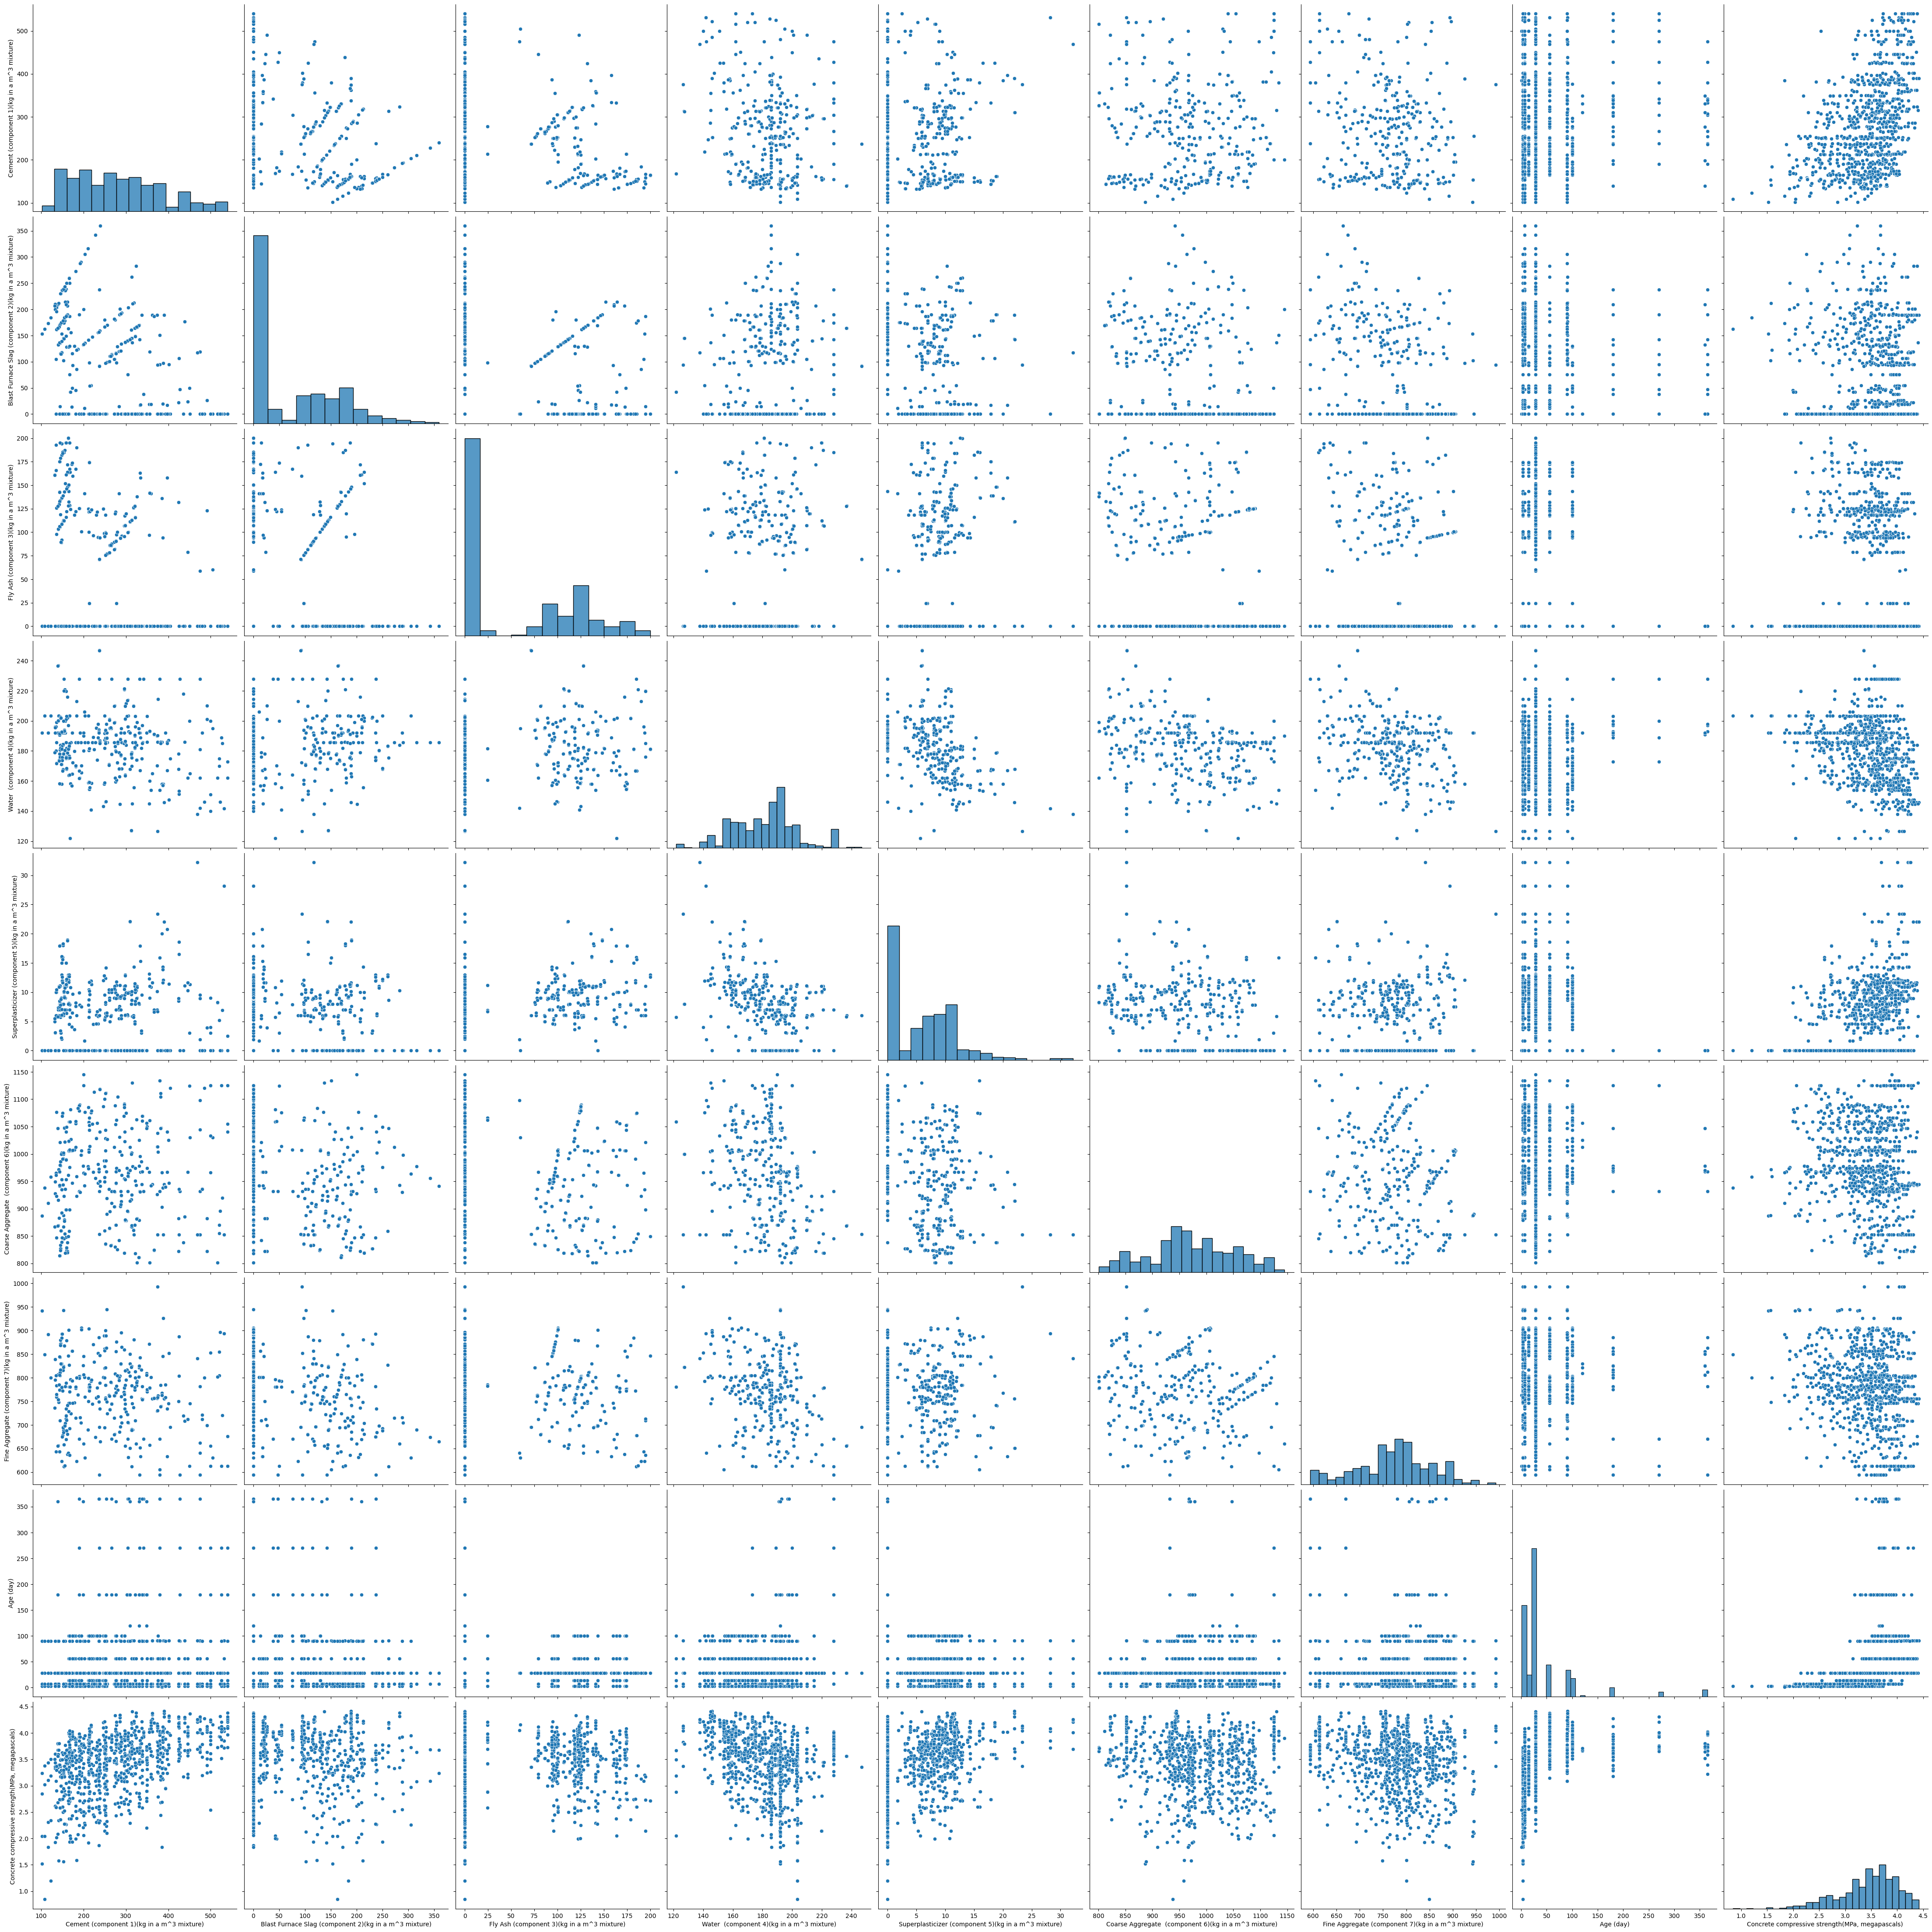

In [177]:
sns.pairplot(data ,  height=5, markers="o" ) 

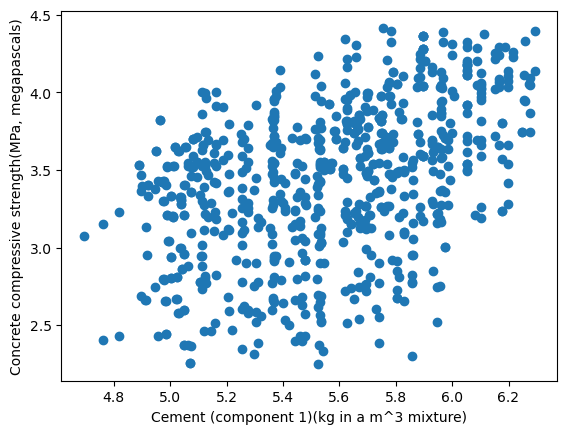

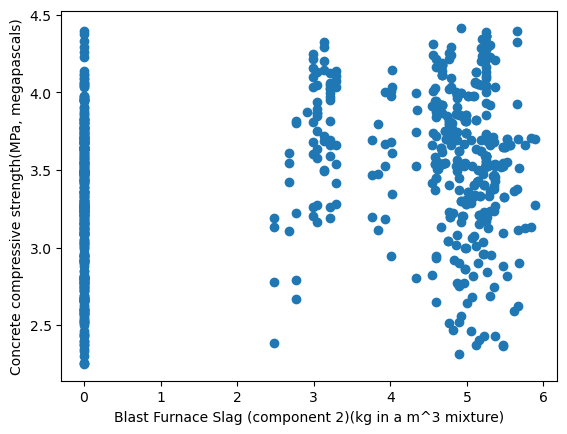

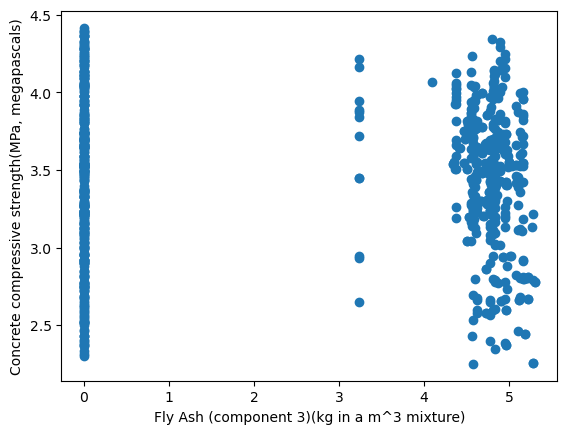

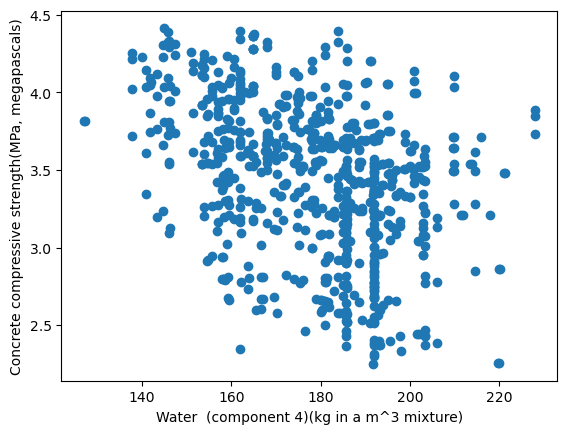

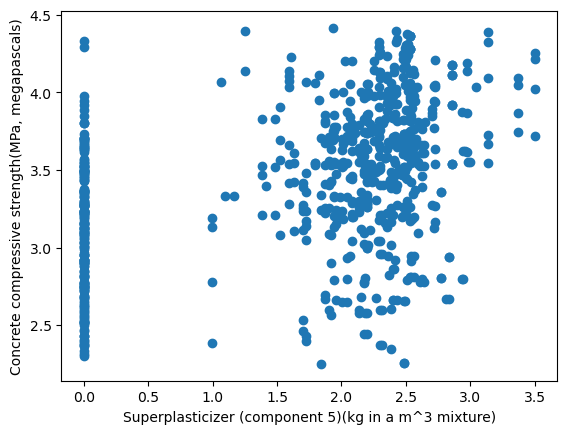

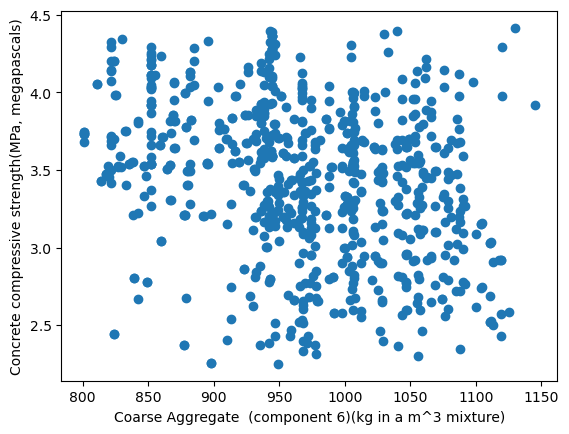

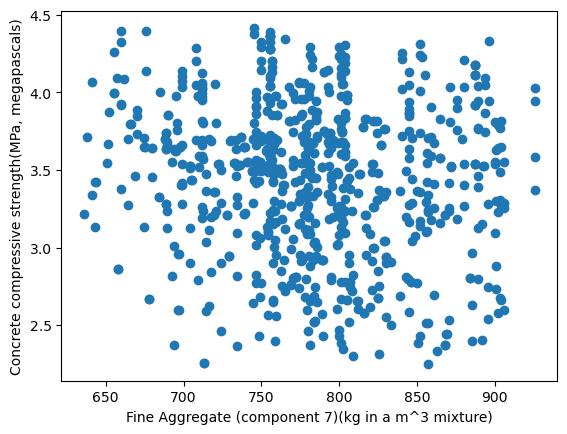

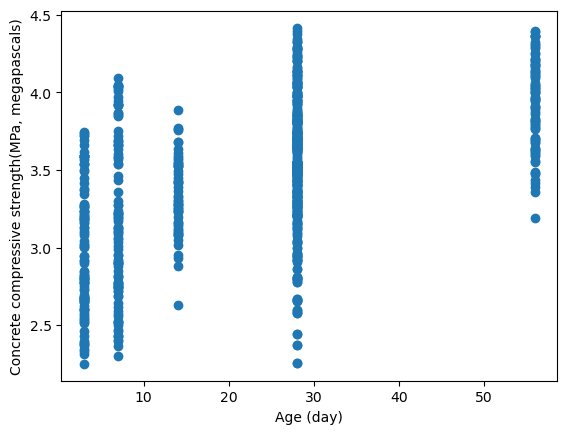

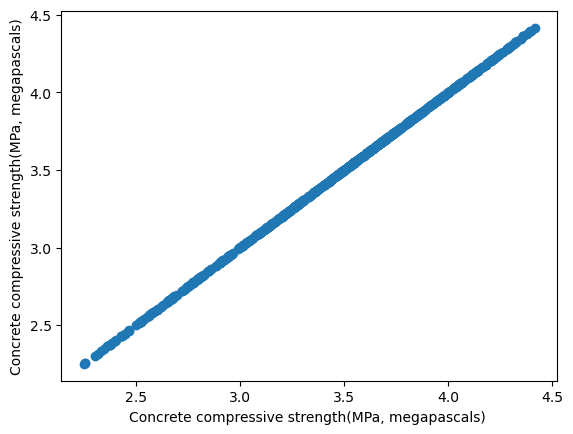

In [179]:
for feature in df.columns:

    plt.scatter(df[feature],df.iloc[:, -1 ])
    plt.xlabel(feature)
    plt.ylabel('Concrete compressive strength(MPa, megapascals)')
    plt.show()

<h3>TRAIN TEST SPLIT AND SCALLING</h3>

In [183]:
feature=['Cement (component 1)(kg in a m^3 mixture)','Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
         'Fly Ash (component 3)(kg in a m^3 mixture)','Water  (component 4)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)','Age (day)']
X=df[feature]
y=df['Concrete compressive strength(MPa, megapascals) ']
print(X.shape)
print(y.shape)

(755, 8)
(755,)


In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

<h3>LINEAR REGRESSION</h3>

In [202]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)
y_pred_lr=lr.predict(X_test_scaled)

<h3>Random Forest Regression</h3>

In [196]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred_rf=rf.predict(X_test_scaled)

<h2>MODEL EVALUTION</h2>

In [211]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.3f}")
    print("-"*35)
    return rmse, r2

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression Performance:
  RMSE: 0.23
  R²: 0.767
-----------------------------------
Random Forest Regressor Performance:
  RMSE: 0.17
  R²: 0.882
-----------------------------------


(np.float64(0.1674805470411007), 0.8815837388505614)

<h2>Feature Importance </h2>

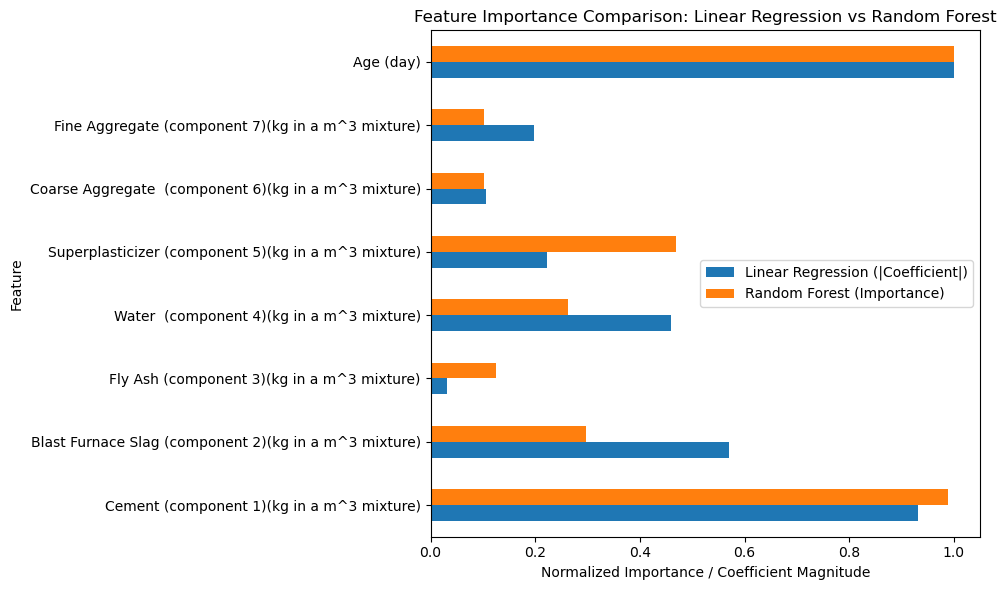


Feature Influence Comparison (Unnormalized):
                                                    Linear Regression (|Coefficient|)  \
Feature                                                                                 
Age (day)                                                                    0.253878   
Cement (component 1)(kg in a m^3 mixture)                                    0.236418   
Superplasticizer (component 5)(kg in a m^3 mixt...                           0.056502   
Blast Furnace Slag (component 2)(kg in a m^3 mi...                           0.144699   
Water  (component 4)(kg in a m^3 mixture)                                    0.116550   
Fly Ash (component 3)(kg in a m^3 mixture)                                   0.008076   
Fine Aggregate (component 7)(kg in a m^3 mixture)                            0.050272   
Coarse Aggregate  (component 6)(kg in a m^3 mix...                           0.027060   

                                                    Random Fore

In [212]:
coef_lr = np.abs(lr.coef_)

importance_rf = rf.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': feature,
    'Linear Regression (|Coefficient|)': coef_lr,
    'Random Forest (Importance)': importance_rf
}).set_index('Feature')


feature_importance_df_norm = feature_importance_df / feature_importance_df.max()


feature_importance_df_norm.plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance Comparison: Linear Regression vs Random Forest")
plt.xlabel("Normalized Importance / Coefficient Magnitude")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()

print("\nFeature Influence Comparison (Unnormalized):")
print(feature_importance_df.sort_values(by='Random Forest (Importance)', ascending=False))


<h2>Visualization: Actual vs Predicted</h2>

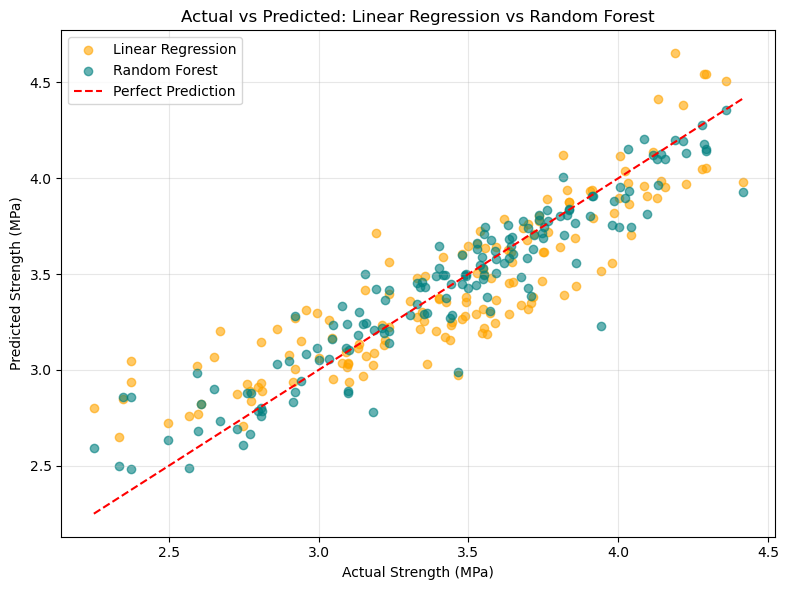

In [208]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Linear Regression", color="orange")
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color="teal")


plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")

plt.xlabel("Actual Strength (MPa)")
plt.ylabel("Predicted Strength (MPa)")
plt.title("Actual vs Predicted: Linear Regression vs Random Forest")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()